<a href="https://colab.research.google.com/github/SUBHASH-KANDHWAY/MACHINE-LEARNING-PROJECTS/blob/master/NATURAL_LANGUAGE_PROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
dataset=pd.read_csv('tweets.csv',encoding="ISO-8859-1")
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [4]:
def gen_freq(text):
  word_list=[]
  for tw_words in text.split():
    word_list.extend(tw_words)
  word_freq=pd.Series(word_list).value_counts()
  word_freq[:20]
  return word_freq
  gen_freq(dataset.text.str)

In [5]:

def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(dataset.text.str)

RT              11053
to               7650
is               5152
in               4491
the              4331
                ...  
#Bhubaneswar        1
disease             1
Buisness            1
89                  1
normal.             1
Length: 19601, dtype: int64

In [6]:
pip install wordcloud

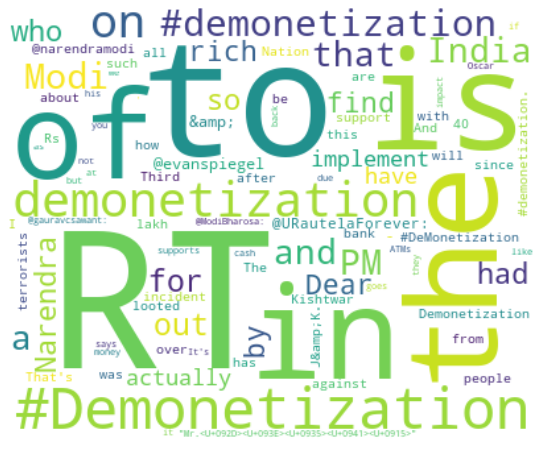

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word frequencies
word_freq = gen_freq(dataset.text.str)

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text
#The above will solve problems related to RT,

In [13]:

#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'by', "didn't", 'else', 'had', 'and', "we're", 'what', 'with', 'was', 'hers', 'were', 'them', "shouldn't", 'or', 'could', 'above', 'there', 'while', 'but', "i'd", 'off', 'ought', 'www', "he'll", 'before', 'for', 'has', "shan't", "doesn't", 'about', 'any', 'how', "that's", 'you', 'if', 'yours', 'to', 'here', "wouldn't", 'herself', 'being', 'have', 'itself', "i'll", 'just', 'out', 'where', 'be', "we'd", "we've", 'its', "she's", 'most', "mustn't", 'very', 'did', 'into', "haven't", 'she', 'down', 'further', "they're", "let's", 'same', 'each', 'myself', 'shall', 'some', 'a', 'should', 'her', "it's", 'on', 'me', "when's", "they've", "don't", 'our', 'doing', 'not', 'own', 'during', 'get', "hadn't", "couldn't", 'because', 'few', "he'd", 'in', 'my', 'other', 'r', 'we', 'both', "what's", 'such', 'at', "they'll", "won't", "she'd", 'since', 'do', 'why', 'against', 'he', 'than', 'they', 'themselves', 'cannot', 'himself', 'otherwise', 'below', 'no', "you'd", "can't", 'who', 'your', 'their', 'yourse

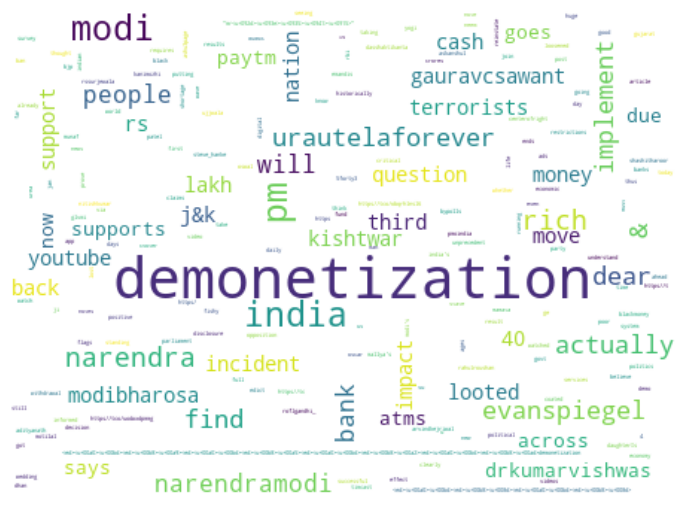

In [14]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
  from nltk.tokenize import sent_tokenize,word_tokenize
  import nltk
  nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
text="Psychologists have also observed that social media exacerbates the tendency for frequent users to develop a skewed impression of the world which is seldom accurate or healthy. Young girls and women, for example, may develop unrealistic standards when it comes to their looks and bodies based on what they see on social media."
sent_tokenize(text)
word_tokenize(text)

['Psychologists',
 'have',
 'also',
 'observed',
 'that',
 'social',
 'media',
 'exacerbates',
 'the',
 'tendency',
 'for',
 'frequent',
 'users',
 'to',
 'develop',
 'a',
 'skewed',
 'impression',
 'of',
 'the',
 'world',
 'which',
 'is',
 'seldom',
 'accurate',
 'or',
 'healthy',
 '.',
 'Young',
 'girls',
 'and',
 'women',
 ',',
 'for',
 'example',
 ',',
 'may',
 'develop',
 'unrealistic',
 'standards',
 'when',
 'it',
 'comes',
 'to',
 'their',
 'looks',
 'and',
 'bodies',
 'based',
 'on',
 'what',
 'they',
 'see',
 'on',
 'social',
 'media',
 '.']

In [34]:
from nltk.stem import PorterStemmer
stemmer=nltk.PorterStemmer()
print(stemmer.stem("raining"),stemmer.stem("decreases"))


rain decreas


In [24]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lem=WordNetLemmatizer()
print(lem.lemmatize("crying"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
cry


In [27]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
token=word_tokenize(text)
pos_tag(token)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Psychologists', 'NNS'),
 ('have', 'VBP'),
 ('also', 'RB'),
 ('observed', 'VBN'),
 ('that', 'IN'),
 ('social', 'JJ'),
 ('media', 'NNS'),
 ('exacerbates', 'VBZ'),
 ('the', 'DT'),
 ('tendency', 'NN'),
 ('for', 'IN'),
 ('frequent', 'JJ'),
 ('users', 'NNS'),
 ('to', 'TO'),
 ('develop', 'VB'),
 ('a', 'DT'),
 ('skewed', 'JJ'),
 ('impression', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('which', 'WDT'),
 ('is', 'VBZ'),
 ('seldom', 'JJ'),
 ('accurate', 'NN'),
 ('or', 'CC'),
 ('healthy', 'JJ'),
 ('.', '.'),
 ('Young', 'NNP'),
 ('girls', 'NNS'),
 ('and', 'CC'),
 ('women', 'NNS'),
 (',', ','),
 ('for', 'IN'),
 ('example', 'NN'),
 (',', ','),
 ('may', 'MD'),
 ('develop', 'VB'),
 ('unrealistic', 'JJ'),
 ('standards', 'NNS'),
 ('when', 'WRB'),
 ('it', 'PRP'),
 ('comes', 'VBZ'),
 ('to', 'TO'),
 ('their', 'PRP$'),
 ('looks', 'NNS'),
 ('and', 'CC'),
 ('bodies', 'NNS'),
 ('based', 'VBN'),
 ('on', 'IN'),
 ('what', 'WP'),
 ('they', 'PRP'),
 ('see', 'VBP'),
 ('on', 'IN'),
 ('social', 'JJ'),

In [31]:
from nltk.corpus import wordnet
wordnet.synsets=('computer')

In [35]:
from nltk import ngrams
n=2
for grams in ngrams(word_tokenize(text),n):
  print(grams)

('Psychologists', 'have')
('have', 'also')
('also', 'observed')
('observed', 'that')
('that', 'social')
('social', 'media')
('media', 'exacerbates')
('exacerbates', 'the')
('the', 'tendency')
('tendency', 'for')
('for', 'frequent')
('frequent', 'users')
('users', 'to')
('to', 'develop')
('develop', 'a')
('a', 'skewed')
('skewed', 'impression')
('impression', 'of')
('of', 'the')
('the', 'world')
('world', 'which')
('which', 'is')
('is', 'seldom')
('seldom', 'accurate')
('accurate', 'or')
('or', 'healthy')
('healthy', '.')
('.', 'Young')
('Young', 'girls')
('girls', 'and')
('and', 'women')
('women', ',')
(',', 'for')
('for', 'example')
('example', ',')
(',', 'may')
('may', 'develop')
('develop', 'unrealistic')
('unrealistic', 'standards')
('standards', 'when')
('when', 'it')
('it', 'comes')
('comes', 'to')
('to', 'their')
('their', 'looks')
('looks', 'and')
('and', 'bodies')
('bodies', 'based')
('based', 'on')
('on', 'what')
('what', 'they')
('they', 'see')
('see', 'on')
('on', 'social')

In [37]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
print(lem.lemmatize("controlling"))

controlling


In [38]:
#Load the dataset
import pandas as pd

dataset = pd.read_csv('final_dataset_basicmlmodel.csv')
dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [39]:
for index, tweet in enumerate(dataset["tweet"][10:15]):
    print(index+1,".",tweet)

1 .  â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex
2 . we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love #
3 . i get to see my daddy today!!   #80days #gettingfed
4 . ouch...junior is angryð#got7 #junior #yugyoem   #omg 
5 . i am thankful for having a paner. #thankful #positive     


In [40]:

import re

#Clean text from noise
def clean_text(text):
    #Filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [41]:
dataset['clean_text'] = dataset.tweet.apply(lambda x: clean_text(x))

In [43]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq



In [44]:
#Check whether a negation term is present in the text
def any_neg(words):
    for word in words:
        if word in ['n', 'no', 'non', 'not'] or re.search(r"\wn't", word):
            return 1
    else:
        return 0

In [45]:
#Check whether one of the 100 rare words is present in the text
def any_rare(words, rare_100):
    for word in words:
        if word in rare_100:
            return 1
    else:
        return 0

In [46]:
#Check whether prompt words are present
def is_question(words):
    for word in words:
        if word in ['when', 'what', 'how', 'why', 'who']:
            return 1
    else:
        return 0

In [48]:
word_freq = gen_freq(dataset.clean_text.str)
#100 most rare words in the dataset
rare_100 = word_freq[-100:]
#Number of words in a tweet
dataset['word_count'] = dataset.clean_text.str.split().apply(lambda x: len(x))
#Negation present or not
dataset['any_neg'] = dataset.clean_text.str.split().apply(lambda x: any_neg(x))
#Prompt present or not
dataset['is_question'] = dataset.clean_text.str.split().apply(lambda x: is_question(x))
#Any of the most 100 rare words present or not
dataset['any_rare'] = dataset.clean_text.str.split().apply(lambda x: any_rare(x, rare_100))
#Character count of the tweet
dataset['char_count'] = dataset.clean_text.apply(lambda x: len(x))
word_freq = gen_freq(dataset.clean_text.str)
#100 most rare words in the dataset
rare_100 = word_freq[-100:]
#Number of words in a tweet
dataset['word_count'] = dataset.clean_text.str.split().apply(lambda x: len(x))
#Negation present or not
dataset['any_neg'] = dataset.clean_text.str.split().apply(lambda x: any_neg(x))
#Prompt present or not
dataset['is_question'] = dataset.clean_text.str.split().apply(lambda x: is_question(x))
#Any of the most 100 rare words present or not
dataset['any_rare'] = dataset.clean_text.str.split().apply(lambda x: any_rare(x, rare_100))
#Character count of the tweet
dataset['char_count'] = dataset.clean_text.apply(lambda x: len(x))

In [49]:
#Top 10 common words are
gen_freq(dataset.clean_text.str)[:10]

user    3351
the     1880
to      1497
a       1232
you      949
in       899
of       893
is       853
and      821
i        805
dtype: int64

In [50]:
dataset.head()

,id,label,tweet,clean_text,word_count,any_neg,is_question,any_rare,char_count
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...,18,0,1,0,102
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can't us...,19,1,0,0,122
2,3,0,bihday your majesty,bihday your majesty,3,0,0,0,21
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,12,0,0,0,86
4,5,0,factsguide: society now #motivation,factsguide society now motivation,4,0,0,0,39


In [51]:
from sklearn.model_selection import train_test_split

X = dataset[['word_count', 'any_neg', 'any_rare', 'char_count', 'is_question']]
y = dataset.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=27)

In [52]:
from sklearn.naive_bayes import GaussianNB

#Initialize GaussianNB classifier
model = GaussianNB()
#Fit the model on the train dataset
model = model.fit(X_train, y_train)
#Make predictions on the test dataset
pred = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

Accuracy: 60.38095238095238 %
